In [1]:
!pip install --upgrade openai

     -------------------------------------- 220.3/220.3 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.2.4
    Uninstalling openai-1.2.4:
      Successfully uninstalled openai-1.2.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
litellm 0.13.2 requires openai<0.29.0,>=0.27.0, but you have openai 1.3.0 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!openai --version

openai 1.3.0


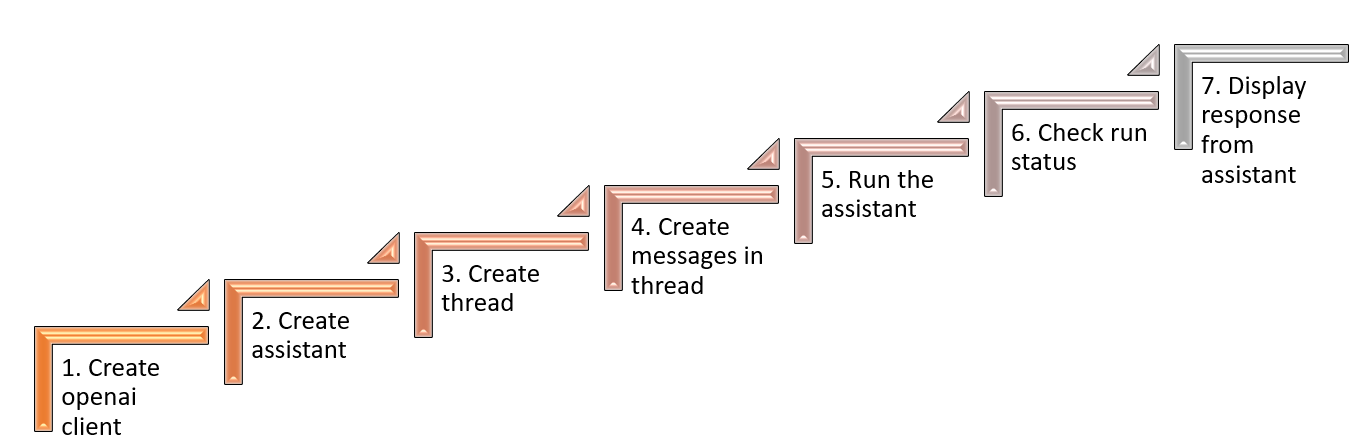

In [3]:
from openai import OpenAI

client = OpenAI(api_key = "")

In [4]:
import json

def show_json(obj):
    display(json.loads(obj.model_dump_json()))

In [5]:
assistant = client.beta.assistants.create(
    name="Math Tutor",
    instructions="You are a maths expert.",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4-1106-preview"
)

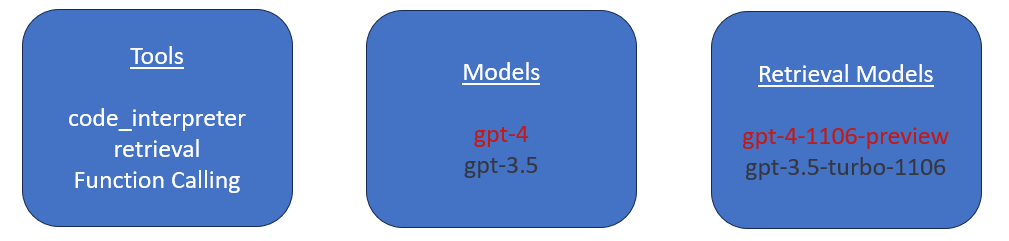

In [6]:
#print(assistant)
show_json(assistant)

{'id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
 'created_at': 1700126680,
 'description': None,
 'file_ids': [],
 'instructions': 'You are a maths expert.',
 'metadata': {},
 'model': 'gpt-4-1106-preview',
 'name': 'Math Tutor',
 'object': 'assistant',
 'tools': [{'type': 'code_interpreter'}]}

In [7]:
thread = client.beta.threads.create()

In [8]:
#print(thread)
show_json(thread)

{'id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r',
 'created_at': 1700126689,
 'metadata': {},
 'object': 'thread'}

In [9]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="""A tyre manufacturing company kept a record of the distance covered before a tyre needed to be replaced.
                The table shows the results of 1000 cases.
                Distance(in km)	Less than 4000	4000 to 9000	9001 to 14000	More than 14000
                Frequency	20	210	325	445
                If a tyre is bought from this company, what is the probability that :
                (i) it has to be substituted before 4000 km is covered?
                (ii) it will last more than 9000 km?
                (iii) it has to be replaced after 4000 km and 14000 km is covered by it?"""
)

In [10]:
#print(message)
show_json(message)

{'id': 'msg_knC531W6FgLwkBVoGy96FkFV',
 'assistant_id': None,
 'content': [{'text': {'annotations': [],
    'value': 'A tyre manufacturing company kept a record of the distance covered before a tyre needed to be replaced.\n                The table shows the results of 1000 cases.\n                Distance(in km)\tLess than 4000\t4000 to 9000\t9001 to 14000\tMore than 14000\n                Frequency\t20\t210\t325\t445\n                If a tyre is bought from this company, what is the probability that :\n                (i) it has to be substituted before 4000 km is covered?\n                (ii) it will last more than 9000 km?\n                (iii) it has to be replaced after 4000 km and 14000 km is covered by it?'},
   'type': 'text'}],
 'created_at': 1700126695,
 'file_ids': [],
 'metadata': {},
 'object': 'thread.message',
 'role': 'user',
 'run_id': None,
 'thread_id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r'}

In [11]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

In [12]:
#print(run)
show_json(run)

{'id': 'run_6jJxgKkFu7YUrSnGpIKUhREg',
 'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1700126700,
 'expires_at': 1700127300,
 'failed_at': None,
 'file_ids': [],
 'instructions': 'You are a maths expert.',
 'last_error': None,
 'metadata': {},
 'model': 'gpt-4-1106-preview',
 'object': 'thread.run',
 'required_action': None,
 'started_at': None,
 'status': 'queued',
 'thread_id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r',
 'tools': [{'type': 'code_interpreter'}]}

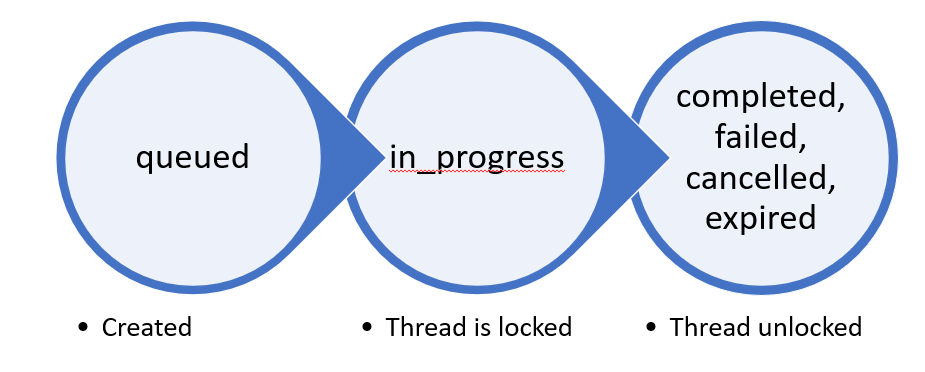

In [13]:
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

In [14]:
show_json(run)
print(run.instructions, run.status)

{'id': 'run_6jJxgKkFu7YUrSnGpIKUhREg',
 'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1700126700,
 'expires_at': 1700127300,
 'failed_at': None,
 'file_ids': [],
 'instructions': 'You are a maths expert.',
 'last_error': None,
 'metadata': {},
 'model': 'gpt-4-1106-preview',
 'object': 'thread.run',
 'required_action': None,
 'started_at': 1700126700,
 'status': 'in_progress',
 'thread_id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r',
 'tools': [{'type': 'code_interpreter'}]}

You are a maths expert. in_progress


In [15]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

In [16]:
show_json(messages)

{'data': [{'id': 'msg_i6hY84zc5spZoFnxJUzrrD9I',
   'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
   'content': [{'text': {'annotations': [],
      'value': "To find the probabilities requested, we will use the frequency distribution provided. First, let's understand what each part of the question is asking for:\n\n(i) Probability that a tyre has to be substituted before 4000 km is covered:\nThis is essentially asking for the probability of selecting a tyre with a lifespan of less than 4000 km from the total population of tyres.\n\n(ii) Probability that a tyre will last more than 9000 km:\nThis entails the probability of selecting a tyre that lasts either from 9001 to 14000 km or more than 14000 km.\n\n(iii) Probability that a tyre has to be replaced after 4000 km and before 14000 km is covered:\nThis is the probability that the tyre's lifespan is between 4001 and 14000 km (inclusive of 9000 km but exclusive of 14000 km).\n\nLet's denote the frequencies like this:\nA = Frequency of 

In [17]:
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

show_json(run)

{'id': 'run_6jJxgKkFu7YUrSnGpIKUhREg',
 'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
 'cancelled_at': None,
 'completed_at': 1700126735,
 'created_at': 1700126700,
 'expires_at': None,
 'failed_at': None,
 'file_ids': [],
 'instructions': 'You are a maths expert.',
 'last_error': None,
 'metadata': {},
 'model': 'gpt-4-1106-preview',
 'object': 'thread.run',
 'required_action': None,
 'started_at': 1700126700,
 'status': 'completed',
 'thread_id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r',
 'tools': [{'type': 'code_interpreter'}]}

In [18]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

show_json(messages)

{'data': [{'id': 'msg_eNwWlR0A4jc5zA443Xith6ED',
   'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
   'content': [{'text': {'annotations': [],
      'value': 'The probabilities for each of the scenarios are as follows:\n\n(i) The probability that a tyre has to be substituted before 4000 km is covered is \\( P(\\text{less than 4000 km}) = 0.02 \\) or 2%.\n\n(ii) The probability that a tyre will last more than 9000 km is \\( P(\\text{more than 9000 km}) = 0.77 \\) or 77%.\n\n(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \\( P(\\text{4000 km < lifespan < 14000 km}) = 0.535 \\) or 53.5%.'},
     'type': 'text'}],
   'created_at': 1700126727,
   'file_ids': [],
   'metadata': {},
   'object': 'thread.message',
   'role': 'assistant',
   'run_id': 'run_6jJxgKkFu7YUrSnGpIKUhREg',
   'thread_id': 'thread_2geZBvQvXRdGGV3vxe2EHd9r'},
  {'id': 'msg_i6hY84zc5spZoFnxJUzrrD9I',
   'assistant_id': 'asst_Ri9SgyFLKQHZeQkHsUKY6sF3',
   'content': 

In [48]:
print(messages.data[2].content[0].text.value,"\n")
print(messages.data[1].content[0].text.value,"\n")
print(messages.data[0].content[0].text.value,"\n")

A tyre manufacturing company kept a record of the distance covered before a tyre needed to be replaced.
                The table shows the results of 1000 cases.
                Distance(in km)	Less than 4000	4000 to 9000	9001 to 14000	More than 14000
                Frequency	20	210	325	445
                If a tyre is bought from this company, what is the probability that :
                (i) it has to be substituted before 4000 km is covered?
                (ii) it will last more than 9000 km?
                (iii) it has to be replaced after 4000 km and 14000 km is covered by it? 

To find the probabilities requested, we will use the frequency distribution provided. First, let's understand what each part of the question is asking for:

(i) Probability that a tyre has to be substituted before 4000 km is covered:
This is essentially asking for the probability of selecting a tyre with a lifespan of less than 4000 km from the total population of tyres.

(ii) Probability that a tyre 

In [20]:
i=0
value = ""
for msg in messages.data:
    #print(messages.data[i].content[0].text.value,"\n")
    value+=messages.data[i].content[0].text.value
    i=i+1
    
print(value)

The probabilities for each of the scenarios are as follows:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \( P(\text{less than 4000 km}) = 0.02 \) or 2%.

(ii) The probability that a tyre will last more than 9000 km is \( P(\text{more than 9000 km}) = 0.77 \) or 77%.

(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \( P(\text{4000 km < lifespan < 14000 km}) = 0.535 \) or 53.5%.To find the probabilities requested, we will use the frequency distribution provided. First, let's understand what each part of the question is asking for:

(i) Probability that a tyre has to be substituted before 4000 km is covered:
This is essentially asking for the probability of selecting a tyre with a lifespan of less than 4000 km from the total population of tyres.

(ii) Probability that a tyre will last more than 9000 km:
This entails the probability of selecting a tyre that lasts either from 9001 to 14000 km or more

In [21]:
values = [msg.content[0].text.value for msg in messages.data]
#print(values[0])
values[1] = values[0]+values[1]
#print(values[1])
values[2] = values[1]+values[2]
combined_value = ''.join(values)
print(combined_value)

The probabilities for each of the scenarios are as follows:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \( P(\text{less than 4000 km}) = 0.02 \) or 2%.

(ii) The probability that a tyre will last more than 9000 km is \( P(\text{more than 9000 km}) = 0.77 \) or 77%.

(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \( P(\text{4000 km < lifespan < 14000 km}) = 0.535 \) or 53.5%.The probabilities for each of the scenarios are as follows:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \( P(\text{less than 4000 km}) = 0.02 \) or 2%.

(ii) The probability that a tyre will last more than 9000 km is \( P(\text{more than 9000 km}) = 0.77 \) or 77%.

(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \( P(\text{4000 km < lifespan < 14000 km}) = 0.535 \) or 53.5%.To find the probabilities requested, we will use the frequ

In [22]:
values = [msg.content[0].text.value for msg in messages.data]

# Perform cumulative concatenation
cumulative_values = []
current_concatenation = ''
for value in values:
    current_concatenation += value
    cumulative_values.append(current_concatenation)

combined_value = ''.join(cumulative_values)
print(combined_value)


The probabilities for each of the scenarios are as follows:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \( P(\text{less than 4000 km}) = 0.02 \) or 2%.

(ii) The probability that a tyre will last more than 9000 km is \( P(\text{more than 9000 km}) = 0.77 \) or 77%.

(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \( P(\text{4000 km < lifespan < 14000 km}) = 0.535 \) or 53.5%.The probabilities for each of the scenarios are as follows:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \( P(\text{less than 4000 km}) = 0.02 \) or 2%.

(ii) The probability that a tyre will last more than 9000 km is \( P(\text{more than 9000 km}) = 0.77 \) or 77%.

(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \( P(\text{4000 km < lifespan < 14000 km}) = 0.535 \) or 53.5%.To find the probabilities requested, we will use the frequ

In [26]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4-1106-preview")

In [27]:
print(encoding)

<Encoding 'cl100k_base'>


In [28]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [35]:
response_num = num_tokens_from_string(combined_value,"cl100k_base")
print("Number of tokens in response : ",response_num)
instruction_token = num_tokens_from_string(run.instructions,"cl100k_base")
print("Number of tokens in instruction : ",instruction_token)

Number of tokens in response :  1206
Number of tokens in instruction :  6


In [36]:
print("Cost : ",response_num/1000*.03 + instruction_token/1000*.01)

Cost :  0.036239999999999994


In [45]:
input1 = run.instructions + messages.data[2].content[0].text.value
output1 = messages.data[1].content[0].text.value
input2 = run.instructions + messages.data[2].content[0].text.value + messages.data[1].content[0].text.value
output2 = messages.data[0].content[0].text.value

In [47]:
generated_token = num_tokens_from_string(output1+output2,"cl100k_base")
print("generated_token : ",generated_token)
context_token = num_tokens_from_string(input1+input2,"cl100k_base")
print("context_token : ",context_token)

print("Cost : ",generated_token/1000*.03 + context_token/1000*.01)

generated_token :  457
context_token :  611
Cost :  0.01982
